In [1]:
import pandas as pd
import numpy as np
#from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de datos.
df_banks = pd.read_csv("./data/transacciones.csv")
# imprimir la tupla del datset
print("Exploración del conjunto de datos")
print("Tupla:\n", df_banks.shape,"\n")
print("Número de filas:", df_banks.shape[0])
print("Número de columnas:", df_banks.shape[1],"\n")
dtypes = df_banks.dtypes
# Formatear y imprimir los tipos de datos
print("Variable Tipo de datos:")
df_banks.dtypes

Exploración del conjunto de datos
Tupla:
 (6362620, 11) 

Número de filas: 6362620
Número de columnas: 11 

Variable Tipo de datos:


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [3]:
# Descripción básica del dataset
print("**Información estadística**")
df_banks.describe()


**Información estadística**


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df_banks.isnull().values.any()

False

In [5]:
print(df_banks['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [35]:
# Definir los valores
valor_especifico = 8213
total = 6362620

# Calcular el porcentaje
porcentaje = ((valor_especifico * 100) / total)*100

print(f'El porcentaje es: {porcentaje}%')


El porcentaje es: 12.908204481801523%


Total de transacciones: 6362620
Porcentaje de transacciones fraudulentas: 0.13%
Porcentaje de transacciones no fraudulentas: 99.87%


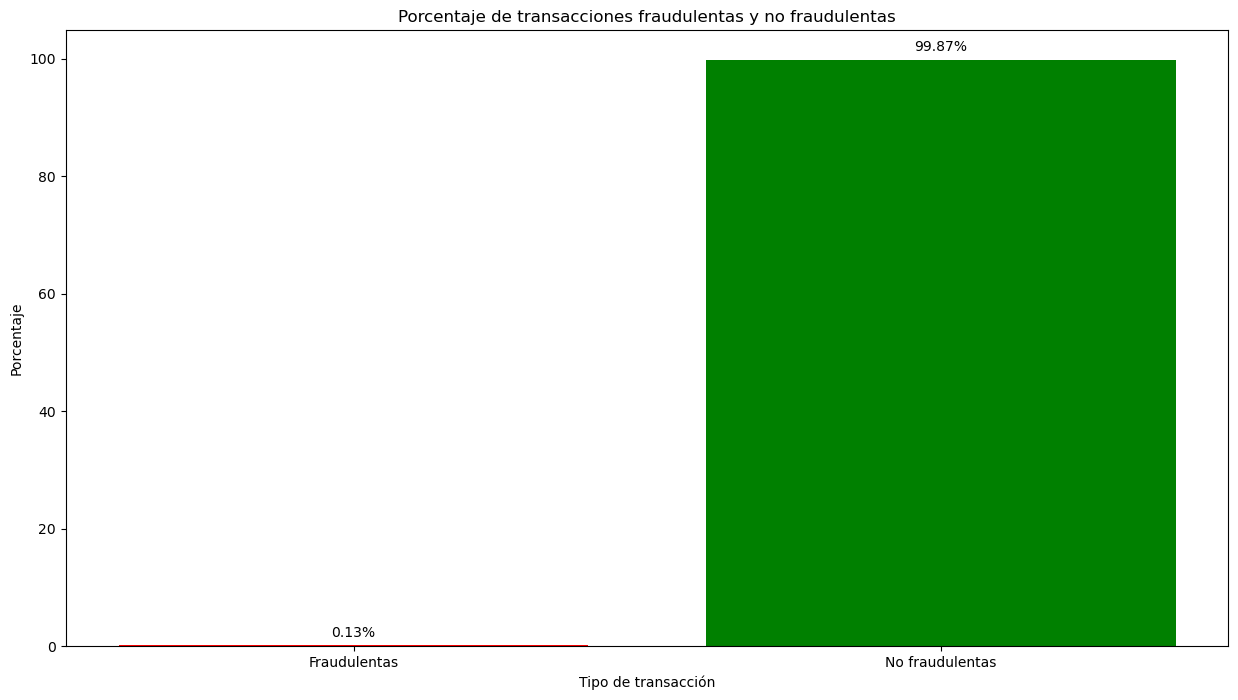

In [16]:
df_banks

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


C:\Users\FullComputador\AppData\Local\Temp\ipykernel_2540\1264159057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_banks, order=df_banks['type'].value_counts().index, palette=custom_palette)


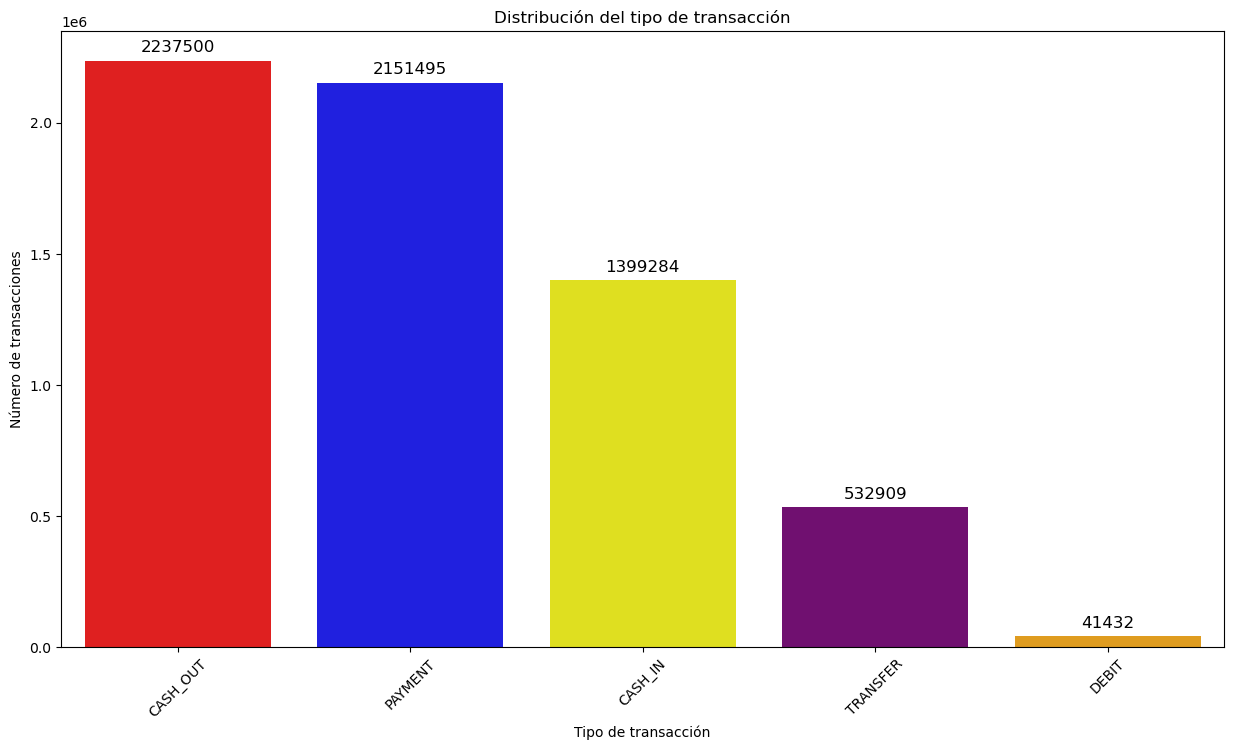

In [7]:
print(df_banks['type'].value_counts())

# Definir una paleta de colores personalizada
custom_palette = ["red", "blue", "yellow", "purple", "orange"]

# Establecer el tamaño de la figura
plt.rcParams['figure.figsize']=[15,8]

# Crear el gráfico de conteo con la paleta de colores personalizada
sns.countplot(x='type', data=df_banks, order=df_banks['type'].value_counts().index, palette=custom_palette)

# Obtener el número de transacciones por tipo
counts = df_banks['type'].value_counts()

# Encontrar el valor máximo para ajustar el texto
max_count = max(counts)

# Añadir valores numéricos en cada barra
for i, count in enumerate(counts):
    # Mostrar el valor numérico en la parte superior de cada barra
    plt.text(i, count + 0.01 * max_count, f'{count}', ha='center', va='bottom', fontsize=12)

# Rotación del texto en el eje x
plt.xticks(rotation=45)

# Etiquetas de los ejes y título
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Distribución del tipo de transacción')

# Mostrar el gráfico
plt.show()



Porcentaje de operaciones fraudulentas: 0.12908204481801522


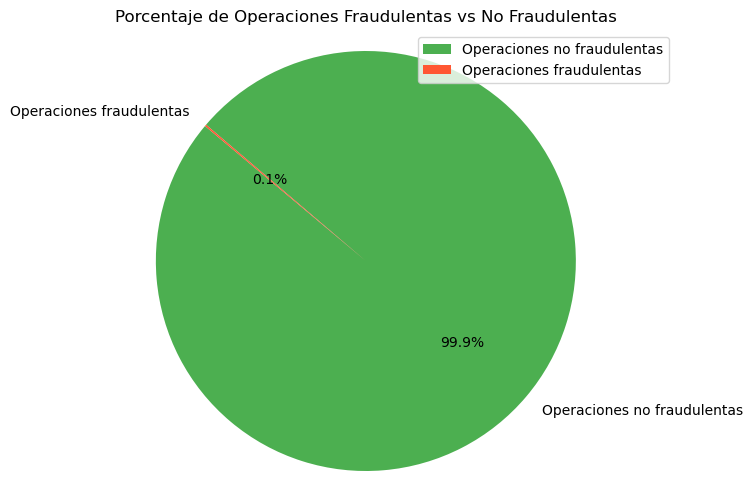

In [15]:
import matplotlib.pyplot as plt

# Calcular el total de operaciones y el porcentaje de operaciones fraudulentas
total = df_banks['isFraud'].value_counts()[0] + df_banks['isFraud'].value_counts()[1]
fraud_percentage = (df_banks['isFraud'].value_counts()[1] / total) * 100

print('Porcentaje de operaciones fraudulentas:', fraud_percentage)

# Graficar el resultado
labels = ['Operaciones no fraudulentas', 'Operaciones fraudulentas']
sizes = [df_banks['isFraud'].value_counts()[0], df_banks['isFraud'].value_counts()[1]]
colors = ['#4CAF50', '#FF5733']  # Colores para las secciones del gráfico

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo
plt.title('Porcentaje de Operaciones Fraudulentas vs No Fraudulentas')

# Agregar leyenda personalizada
plt.legend(labels, loc='best')  # Ubicación automática para la leyenda

plt.show()


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


C:\Users\FullComputador\AppData\Local\Temp\ipykernel_2540\2424035421.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_banks[df_banks['isFraud'] == 1], order=fraudulent_transactions.index, palette='Set2')


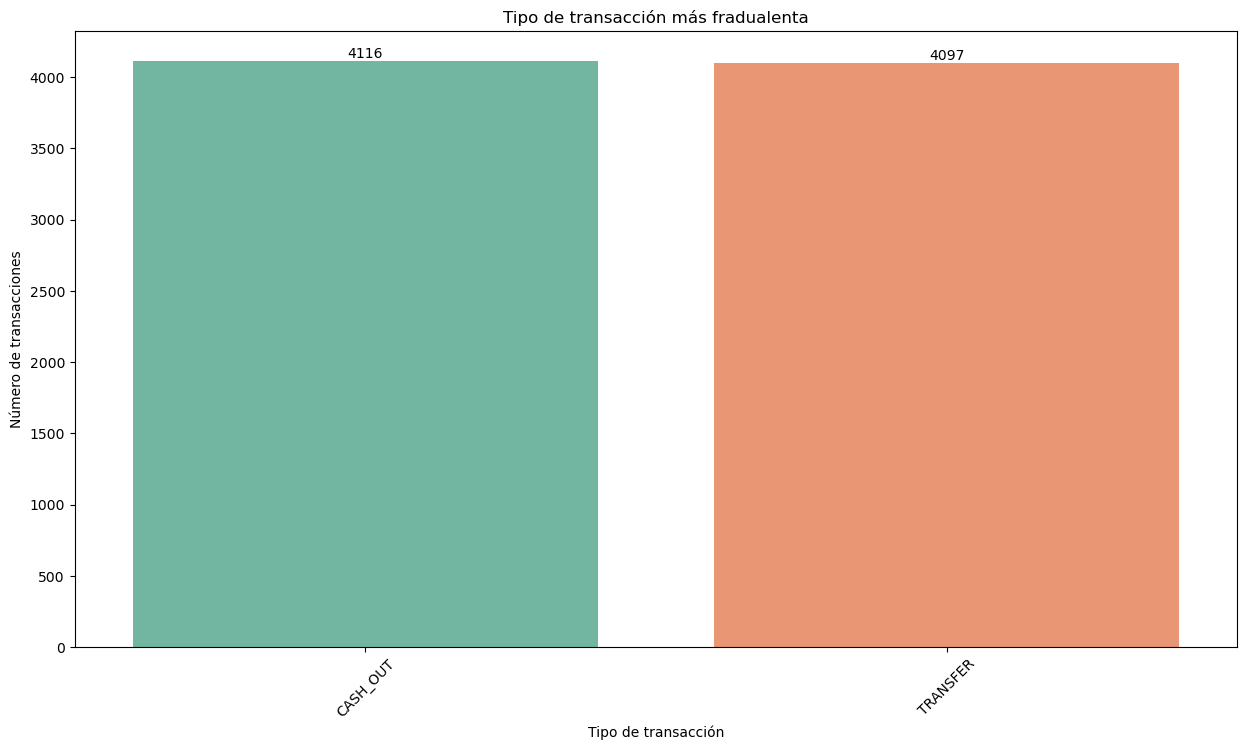

In [9]:
print(df_banks[(df_banks['isFraud'] == 1)]['type'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el recuento de transacciones fraudulentas por tipo
fraudulent_transactions = df_banks[df_banks['isFraud'] == 1]['type'].value_counts()

# Crear el gráfico
plt.figure(figsize=(15,8))

# Graficar el recuento de transacciones fraudulentas por tipo
sns.countplot(x='type', data=df_banks[df_banks['isFraud'] == 1], order=fraudulent_transactions.index, palette='Set2')

# Añadir el total en las etiquetas
for index, value in enumerate(fraudulent_transactions):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotación del texto en el eje x
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Tipo de transacción más fradualenta')

# Mostrar el gráfico
plt.show()


C:\Users\FullComputador\AppData\Local\Temp\ipykernel_2540\4087538312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df_banks[df_banks['amount'] < 1e5], palette=colors)


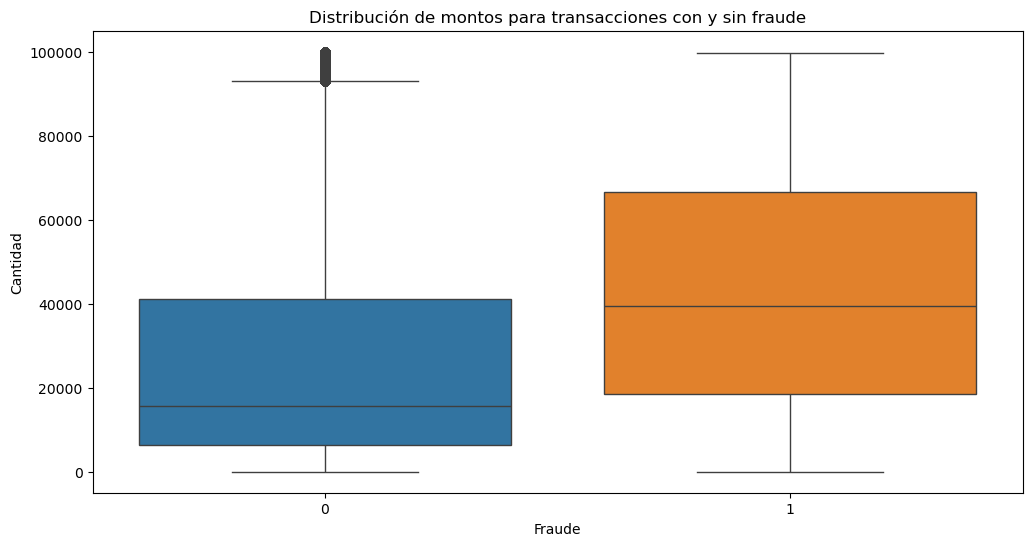

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Definir una paleta de colores con dos colores diferentes
colors = ["#1f77b4", "#ff7f0e"]  # Azul y naranja

# Graficar el boxplot con colores diferentes para cada categoría
sns.boxplot(x='isFraud', y='amount', data=df_banks[df_banks['amount'] < 1e5], palette=colors)

# Personalizar el gráfico
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.title('Distribución de montos para transacciones con y sin fraude')

# Mostrar el gráfico
plt.show()


In [11]:
df_banks[(df_banks['isFlaggedFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
